# 2018年9月全球科技前沿报告
------

数据部 康宸

2018.10.25

In [34]:
from IPython.display import display_html
display_html("""
<div style="text-align:center; margin: 20px 0;">
<p style="color:#FA5882;text-align:center; margin: 10px 0 20px 0;">
如果你希望隐藏代码，只显示数据来源、分析过程与结论。<br/>
请点击后面的“折叠代码”按钮。
</p>
<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">折叠代码</button>
<hr/>
</div>
""", raw=True)

如果你希望隐藏代码，只显示数据来源、分析过程与结论。 
请点击后面的“折叠代码”按钮。
 
 折叠代码

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import jieba
import jieba.analyse
import sys

jieba.analyse.set_idf_path("./dicts/idf.txt")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [18]:
sep_d = pd.read_csv('./1809/sep_all_nat.csv',sep='|',header=0)
sep_d.describe()

,title,content,field,source,date,content_clean,area
count,320,320,320,320,320,320,320
unique,320,320,9,124,28,320,63
top,DARPA与笛卡尔实验室合作进行地理空间云分析项目,据新美国安全中心（CNAS）网站9月10日消息，CNAS发布《填补美国远程穿透打击的裂缝》报...,能源,国防科技信息网,9月17日,日本防卫省发言人宣布，海上自卫队两艘改进型“爱宕”级驱逐舰将装备“标准-6”超音速防空导弹（...,美国
freq,1,1,60,29,22,1,151


2018年9月1日——2018年9月30日

从**124**个信息源，

采集**9**个领域，

**63**个国家或地区，

**320**件科技前沿动态

In [19]:
field_stat = pd.DataFrame(sep_d['field'].value_counts())
field_stat

,field
能源,60
信息,56
生物,47
科技战略,32
海洋,31
新材料,24
航空,24
先进制造,23
航天,23


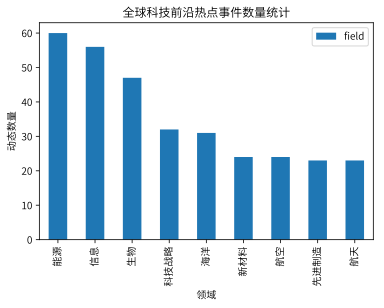

In [20]:
plt.rcParams['font.family'] = ['Source Han Sans CN']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
field_stat.plot(kind = 'bar')
plt.xlabel('领域')
plt.ylabel('动态数量')
plt.title('全球科技前沿热点事件数量统计')
plt.show()

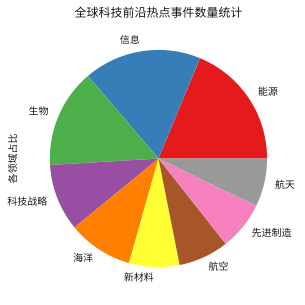

In [21]:
field_stat['proportion'] = field_stat['field'].map(lambda x: x/320)
field_stat
field_stat.plot(y='proportion',kind = 'pie',legend=False,figsize=(5,5),colormap='Set1')
plt.ylabel('各领域占比')
plt.title('全球科技前沿热点事件数量统计')
plt.show()

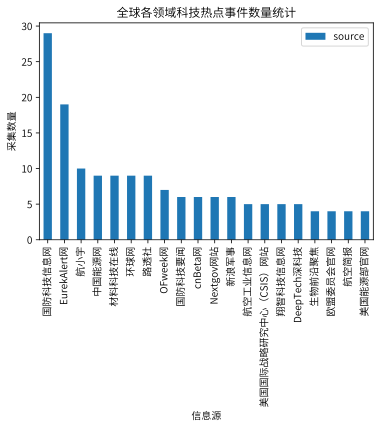

In [22]:
source_stat = pd.DataFrame(sep_d['source'].value_counts())
source_stat[0:20].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

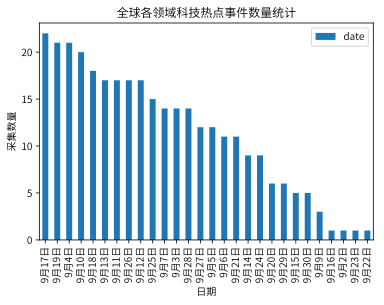

In [23]:
date_stat = pd.DataFrame(sep_d['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

In [52]:
import getnation.need_list as need_list
nation_dict = need_list.nation_dict

In [53]:
sep_us = sep_d[sep_d['area'].str.contains(nation_dict['us']['pattern'])]
sep_cn = sep_d[sep_d['area'].str.contains(nation_dict['cn']['pattern'])]
sep_eu = sep_d[sep_d['area'].str.contains(nation_dict['eu']['pattern'])]
sep_uk = sep_d[sep_d['area'].str.contains(nation_dict['uk']['pattern'])]
sep_fr = sep_d[sep_d['area'].str.contains(nation_dict['fr']['pattern'])]
sep_ge = sep_d[sep_d['area'].str.contains(nation_dict['ge']['pattern'])]
sep_ca = sep_d[sep_d['area'].str.contains(nation_dict['ca']['pattern'])]
sep_au = sep_d[sep_d['area'].str.contains(nation_dict['au']['pattern'])]
sep_jp = sep_d[sep_d['area'].str.contains(nation_dict['jp']['pattern'])]
sep_kr = sep_d[sep_d['area'].str.contains(nation_dict['kr']['pattern'])]
sep_sg = sep_d[sep_d['area'].str.contains(nation_dict['sg']['pattern'])]
sep_ru = sep_d[sep_d['area'].str.contains(nation_dict['ru']['pattern'])]
sep_id = sep_d[sep_d['area'].str.contains(nation_dict['id']['pattern'])]
sep_is = sep_d[sep_d['area'].str.contains(nation_dict['is']['pattern'])]
sep_ch = sep_d[sep_d['area'].str.contains(nation_dict['ch']['pattern'])]
sep_se = sep_d[sep_d['area'].str.contains(nation_dict['se']['pattern'])]
sep_dk = sep_d[sep_d['area'].str.contains(nation_dict['dk']['pattern'])]
sep_nl = sep_d[sep_d['area'].str.contains(nation_dict['nl']['pattern'])]
sep_fi = sep_d[sep_d['area'].str.contains(nation_dict['fi']['pattern'])]
sep_pl = sep_d[sep_d['area'].str.contains(nation_dict['pl']['pattern'])]
sep_es = sep_d[sep_d['area'].str.contains(nation_dict['es']['pattern'])]
sep_at = sep_d[sep_d['area'].str.contains(nation_dict['at']['pattern'])]
sep_it = sep_d[sep_d['area'].str.contains(nation_dict['it']['pattern'])]
sep_qa = sep_d[sep_d['area'].str.contains(nation_dict['qa']['pattern'])]
sep_ir = sep_d[sep_d['area'].str.contains(nation_dict['ir']['pattern'])]
sep_sa = sep_d[sep_d['area'].str.contains(nation_dict['sa']['pattern'])]
sep_in = sep_d[sep_d['area'].str.contains(nation_dict['in']['pattern'])]
sep_br = sep_d[sep_d['area'].str.contains(nation_dict['br']['pattern'])]

In [54]:
data_all = [
    ('United States', sep_us['title'].count()),
    ('China', sep_cn['title'].count()),
    ('United Kingdom', sep_uk['title'].count()),
    ('France', sep_fr['title'].count()),
    ('Germany', sep_ge['title'].count()),
    ('Canada', sep_ca['title'].count()),
    ('Australia', sep_au['title'].count()),
    ('Japan', sep_jp['title'].count()),
    ('Korea', sep_kr['title'].count()),
    ('Singapore', sep_sg['title'].count()),
    ('Russia', sep_ru['title'].count()),
    ('India', sep_id['title'].count()),
    ('Israel', sep_is['title'].count()),
    ('Switzerland', sep_ch['title'].count()),
    ('Sweden', sep_se['title'].count()),
    ('Denmark', sep_dk['title'].count()),
    ('Netherlands', sep_nl['title'].count()),
    ('Finland', sep_fi['title'].count()),
    ('Poland', sep_pl['title'].count()),
    ('Spain', sep_es['title'].count()),
    ('Austria', sep_at['title'].count()),
    ('Italy', sep_it['title'].count()),
    ('Qatar', sep_qa['title'].count()),
    ('Iran', sep_ir['title'].count()),
    ('Saudi Arabia', sep_sa['title'].count()),
    ('Brazil', sep_br['title'].count())
]

In [55]:
from pyecharts import Geo,Style,Map,Page,configure
import echarts_cities_pypkg,echarts_countries_pypkg

In [133]:
style = Style(
        title_top=30,
        title_color="#fff",
        title_pos="center",
        title_text_size=28,
        subtitle_text_size=15,
        width=950,
        height=600,
        background_color='#404a59'
    )
chart = Map("2018年9月全球科技领域活跃度地图", "data from 全球技术地图", **style.init_style)
attr, value = chart.cast(data_all)
chart.add("科技前沿动态", attr, value, maptype="world", is_visualmap=True,
              visual_range=[0, 30], visual_text_color='#fff',visual_range_text=['不活跃', '活跃'],
              is_legend_show=False, is_map_symbol_show=False)
chart

In [104]:
data_kj = [
    ('United States', sep_us[sep_us.field=='科技战略']['title'].count()),
    ('China', sep_cn[sep_cn.field=='科技战略']['title'].count()),
    ('United Kingdom', sep_uk[sep_uk.field=='科技战略']['title'].count()),
    ('France', sep_fr[sep_fr.field=='科技战略']['title'].count()),
    ('Germany', sep_ge[sep_ge.field=='科技战略']['title'].count()),
    ('Canada', sep_ca[sep_ca.field=='科技战略']['title'].count()),
    ('Australia', sep_au[sep_au.field=='科技战略']['title'].count()),
    ('Japan', sep_jp[sep_jp.field=='科技战略']['title'].count()),
    ('Korea', sep_kr[sep_kr.field=='科技战略']['title'].count()),
    ('Singapore', sep_sg[sep_sg.field=='科技战略']['title'].count()),
    ('Russia', sep_ru[sep_ru.field=='科技战略']['title'].count()),
    ('India', sep_id[sep_id.field=='科技战略']['title'].count()),
    ('Israel', sep_is[sep_is.field=='科技战略']['title'].count()),
    ('Switzerland', sep_ch[sep_ch.field=='科技战略']['title'].count()),
    ('Sweden', sep_se[sep_se.field=='科技战略']['title'].count()),
    ('Denmark', sep_dk[sep_dk.field=='科技战略']['title'].count()),
    ('Netherlands', sep_nl[sep_nl.field=='科技战略']['title'].count()),
    ('Finland', sep_fi[sep_fi.field=='科技战略']['title'].count()),
    ('Poland', sep_pl[sep_pl.field=='科技战略']['title'].count()),
    ('Spain', sep_es[sep_es.field=='科技战略']['title'].count()),
    ('Austria', sep_at[sep_at.field=='科技战略']['title'].count()),
    ('Italy', sep_it[sep_it.field=='科技战略']['title'].count()),
    ('Qatar', sep_qa[sep_qa.field=='科技战略']['title'].count()),
    ('Iran', sep_ir[sep_ir.field=='科技战略']['title'].count()),
    ('Saudi Arabia', sep_sa[sep_sa.field=='科技战略']['title'].count()),
    ('Brazil', sep_br[sep_br.field=='科技战略']['title'].count())
]

chart = Map("2018年9月全球科技战略活跃度地图", "data from 全球技术地图", **style.init_style)
attr, value = chart.cast(data_kj)
chart.add("科技前沿动态", attr, value, maptype="world", is_visualmap=True,visual_range_text=['不活跃', '活跃'],
              visual_range=[0, 20], visual_text_color='#fff',
              is_legend_show=False, is_map_symbol_show=False)
chart

In [105]:
data_xx = [
    ('United States', sep_us[sep_us.field=='信息']['title'].count()),
    ('China', sep_cn[sep_cn.field=='信息']['title'].count()),
    ('United Kingdom', sep_uk[sep_uk.field=='信息']['title'].count()),
    ('France', sep_fr[sep_fr.field=='信息']['title'].count()),
    ('Germany', sep_ge[sep_ge.field=='信息']['title'].count()),
    ('Canada', sep_ca[sep_ca.field=='信息']['title'].count()),
    ('Australia', sep_au[sep_au.field=='信息']['title'].count()),
    ('Japan', sep_jp[sep_jp.field=='信息']['title'].count()),
    ('Korea', sep_kr[sep_kr.field=='信息']['title'].count()),
    ('Singapore', sep_sg[sep_sg.field=='信息']['title'].count()),
    ('Russia', sep_ru[sep_ru.field=='信息']['title'].count()),
    ('India', sep_id[sep_id.field=='信息']['title'].count()),
    ('Israel', sep_is[sep_is.field=='信息']['title'].count()),
    ('Switzerland', sep_ch[sep_ch.field=='信息']['title'].count()),
    ('Sweden', sep_se[sep_se.field=='信息']['title'].count()),
    ('Denmark', sep_dk[sep_dk.field=='信息']['title'].count()),
    ('Netherlands', sep_nl[sep_nl.field=='信息']['title'].count()),
    ('Finland', sep_fi[sep_fi.field=='信息']['title'].count()),
    ('Poland', sep_pl[sep_pl.field=='信息']['title'].count()),
    ('Spain', sep_es[sep_es.field=='信息']['title'].count()),
    ('Austria', sep_at[sep_at.field=='信息']['title'].count()),
    ('Italy', sep_it[sep_it.field=='信息']['title'].count()),
    ('Qatar', sep_qa[sep_qa.field=='信息']['title'].count()),
    ('Iran', sep_ir[sep_ir.field=='信息']['title'].count()),
    ('Saudi Arabia', sep_sa[sep_sa.field=='信息']['title'].count()),
    ('Brazil', sep_br[sep_br.field=='信息']['title'].count())
]

chart = Map("2018年9月全球信息领域活跃度地图", "data from 全球技术地图", **style.init_style)
attr, value = chart.cast(data_xx)
chart.add("科技前沿动态", attr, value, maptype="world", is_visualmap=True,visual_range_text=['不活跃', '活跃'],
              visual_range=[0, 5], visual_text_color='#fff',
              is_legend_show=False, is_map_symbol_show=False)
chart

In [106]:
data_sw = [
    ('United States', sep_us[sep_us.field=='生物']['title'].count()),
    ('China', sep_cn[sep_cn.field=='生物']['title'].count()),
    ('United Kingdom', sep_uk[sep_uk.field=='生物']['title'].count()),
    ('France', sep_fr[sep_fr.field=='生物']['title'].count()),
    ('Germany', sep_ge[sep_ge.field=='生物']['title'].count()),
    ('Canada', sep_ca[sep_ca.field=='生物']['title'].count()),
    ('Australia', sep_au[sep_au.field=='生物']['title'].count()),
    ('Japan', sep_jp[sep_jp.field=='生物']['title'].count()),
    ('Korea', sep_kr[sep_kr.field=='生物']['title'].count()),
    ('Singapore', sep_sg[sep_sg.field=='生物']['title'].count()),
    ('Russia', sep_ru[sep_ru.field=='生物']['title'].count()),
    ('India', sep_id[sep_id.field=='生物']['title'].count()),
    ('Israel', sep_is[sep_is.field=='生物']['title'].count()),
    ('Switzerland', sep_ch[sep_ch.field=='生物']['title'].count()),
    ('Sweden', sep_se[sep_se.field=='生物']['title'].count()),
    ('Denmark', sep_dk[sep_dk.field=='生物']['title'].count()),
    ('Netherlands', sep_nl[sep_nl.field=='生物']['title'].count()),
    ('Finland', sep_fi[sep_fi.field=='生物']['title'].count()),
    ('Poland', sep_pl[sep_pl.field=='生物']['title'].count()),
    ('Spain', sep_es[sep_es.field=='生物']['title'].count()),
    ('Austria', sep_at[sep_at.field=='生物']['title'].count()),
    ('Italy', sep_it[sep_it.field=='生物']['title'].count()),
    ('Qatar', sep_qa[sep_qa.field=='生物']['title'].count()),
    ('Iran', sep_ir[sep_ir.field=='生物']['title'].count()),
    ('Saudi Arabia', sep_sa[sep_sa.field=='生物']['title'].count()),
    ('Brazil', sep_br[sep_br.field=='生物']['title'].count())
]

chart = Map("2018年9月全球生物领域活跃度地图", "data from 全球技术地图", **style.init_style)
attr, value = chart.cast(data_sw)
chart.add("科技前沿动态", attr, value, maptype="world", is_visualmap=True,visual_range_text=['不活跃', '活跃'],
              visual_range=[0, 5], visual_text_color='#fff',
              is_legend_show=False, is_map_symbol_show=False)
chart

In [107]:
data_ny = [
    ('United States', sep_us[sep_us.field=='能源']['title'].count()),
    ('China', sep_cn[sep_cn.field=='能源']['title'].count()),
    ('United Kingdom', sep_uk[sep_uk.field=='能源']['title'].count()),
    ('France', sep_fr[sep_fr.field=='能源']['title'].count()),
    ('Germany', sep_ge[sep_ge.field=='能源']['title'].count()),
    ('Canada', sep_ca[sep_ca.field=='能源']['title'].count()),
    ('Australia', sep_au[sep_au.field=='能源']['title'].count()),
    ('Japan', sep_jp[sep_jp.field=='能源']['title'].count()),
    ('Korea', sep_kr[sep_kr.field=='能源']['title'].count()),
    ('Singapore', sep_sg[sep_sg.field=='能源']['title'].count()),
    ('Russia', sep_ru[sep_ru.field=='能源']['title'].count()),
    ('India', sep_id[sep_id.field=='能源']['title'].count()),
    ('Israel', sep_is[sep_is.field=='能源']['title'].count()),
    ('Switzerland', sep_ch[sep_ch.field=='能源']['title'].count()),
    ('Sweden', sep_se[sep_se.field=='能源']['title'].count()),
    ('Denmark', sep_dk[sep_dk.field=='能源']['title'].count()),
    ('Netherlands', sep_nl[sep_nl.field=='能源']['title'].count()),
    ('Finland', sep_fi[sep_fi.field=='能源']['title'].count()),
    ('Poland', sep_pl[sep_pl.field=='能源']['title'].count()),
    ('Spain', sep_es[sep_es.field=='能源']['title'].count()),
    ('Austria', sep_at[sep_at.field=='能源']['title'].count()),
    ('Italy', sep_it[sep_it.field=='能源']['title'].count()),
    ('Qatar', sep_qa[sep_qa.field=='能源']['title'].count()),
    ('Iran', sep_ir[sep_ir.field=='能源']['title'].count()),
    ('Saudi Arabia', sep_sa[sep_sa.field=='能源']['title'].count()),
    ('Brazil', sep_br[sep_br.field=='能源']['title'].count())
]

chart = Map("2018年9月全球能源领域活跃度地图", "data from 全球技术地图", **style.init_style)
attr, value = chart.cast(data_ny)
chart.add("科技前沿动态", attr, value, maptype="world", is_visualmap=True,visual_range_text=['不活跃', '活跃'],
              visual_range=[0, 10], visual_text_color='#fff',
              is_legend_show=False, is_map_symbol_show=False)
chart

In [108]:
data_hy = [
    ('United States', sep_us[sep_us.field=='海洋']['title'].count()),
    ('China', sep_cn[sep_cn.field=='海洋']['title'].count()),
    ('United Kingdom', sep_uk[sep_uk.field=='海洋']['title'].count()),
    ('France', sep_fr[sep_fr.field=='海洋']['title'].count()),
    ('Germany', sep_ge[sep_ge.field=='海洋']['title'].count()),
    ('Canada', sep_ca[sep_ca.field=='海洋']['title'].count()),
    ('Australia', sep_au[sep_au.field=='海洋']['title'].count()),
    ('Japan', sep_jp[sep_jp.field=='海洋']['title'].count()),
    ('Korea', sep_kr[sep_kr.field=='海洋']['title'].count()),
    ('Singapore', sep_sg[sep_sg.field=='海洋']['title'].count()),
    ('Russia', sep_ru[sep_ru.field=='海洋']['title'].count()),
    ('India', sep_id[sep_id.field=='海洋']['title'].count()),
    ('Israel', sep_is[sep_is.field=='海洋']['title'].count()),
    ('Switzerland', sep_ch[sep_ch.field=='海洋']['title'].count()),
    ('Sweden', sep_se[sep_se.field=='海洋']['title'].count()),
    ('Denmark', sep_dk[sep_dk.field=='海洋']['title'].count()),
    ('Netherlands', sep_nl[sep_nl.field=='海洋']['title'].count()),
    ('Finland', sep_fi[sep_fi.field=='海洋']['title'].count()),
    ('Poland', sep_pl[sep_pl.field=='海洋']['title'].count()),
    ('Spain', sep_es[sep_es.field=='海洋']['title'].count()),
    ('Austria', sep_at[sep_at.field=='海洋']['title'].count()),
    ('Italy', sep_it[sep_it.field=='海洋']['title'].count()),
    ('Qatar', sep_qa[sep_qa.field=='海洋']['title'].count()),
    ('Iran', sep_ir[sep_ir.field=='海洋']['title'].count()),
    ('Saudi Arabia', sep_sa[sep_sa.field=='海洋']['title'].count()),
    ('Brazil', sep_br[sep_br.field=='海洋']['title'].count())
]

chart = Map("2018年9月全球海洋领域活跃度地图", "data from 全球技术地图", **style.init_style)
attr, value = chart.cast(data_hy)
chart.add("科技前沿动态", attr, value, maptype="world", is_visualmap=True,visual_range_text=['不活跃', '活跃'],
              visual_range=[0, 15], visual_text_color='#fff',
              is_legend_show=False, is_map_symbol_show=False)
chart

In [109]:
data_hk = [
    ('United States', sep_us[sep_us.field=='航空']['title'].count()),
    ('China', sep_cn[sep_cn.field=='航空']['title'].count()),
    ('United Kingdom', sep_uk[sep_uk.field=='航空']['title'].count()),
    ('France', sep_fr[sep_fr.field=='航空']['title'].count()),
    ('Germany', sep_ge[sep_ge.field=='航空']['title'].count()),
    ('Canada', sep_ca[sep_ca.field=='航空']['title'].count()),
    ('Australia', sep_au[sep_au.field=='航空']['title'].count()),
    ('Japan', sep_jp[sep_jp.field=='航空']['title'].count()),
    ('Korea', sep_kr[sep_kr.field=='航空']['title'].count()),
    ('Singapore', sep_sg[sep_sg.field=='航空']['title'].count()),
    ('Russia', sep_ru[sep_ru.field=='航空']['title'].count()),
    ('India', sep_id[sep_id.field=='航空']['title'].count()),
    ('Israel', sep_is[sep_is.field=='航空']['title'].count()),
    ('Switzerland', sep_ch[sep_ch.field=='航空']['title'].count()),
    ('Sweden', sep_se[sep_se.field=='航空']['title'].count()),
    ('Denmark', sep_dk[sep_dk.field=='航空']['title'].count()),
    ('Netherlands', sep_nl[sep_nl.field=='航空']['title'].count()),
    ('Finland', sep_fi[sep_fi.field=='航空']['title'].count()),
    ('Poland', sep_pl[sep_pl.field=='航空']['title'].count()),
    ('Spain', sep_es[sep_es.field=='航空']['title'].count()),
    ('Austria', sep_at[sep_at.field=='航空']['title'].count()),
    ('Italy', sep_it[sep_it.field=='航空']['title'].count()),
    ('Qatar', sep_qa[sep_qa.field=='航空']['title'].count()),
    ('Iran', sep_ir[sep_ir.field=='航空']['title'].count()),
    ('Saudi Arabia', sep_sa[sep_sa.field=='航空']['title'].count()),
    ('Brazil', sep_br[sep_br.field=='航空']['title'].count())
]

chart = Map("2018年9月全球航空领域活跃度地图", "data from 全球技术地图", **style.init_style)
attr, value = chart.cast(data_hk)
chart.add("科技前沿动态", attr, value, maptype="world", is_visualmap=True,visual_range_text=['不活跃', '活跃'],
              visual_range=[0, 3], visual_text_color='#fff',
              is_legend_show=False, is_map_symbol_show=False)
chart

In [110]:
data_ht = [
    ('United States', sep_us[sep_us.field=='航天']['title'].count()),
    ('China', sep_cn[sep_cn.field=='航天']['title'].count()),
    ('United Kingdom', sep_uk[sep_uk.field=='航天']['title'].count()),
    ('France', sep_fr[sep_fr.field=='航天']['title'].count()),
    ('Germany', sep_ge[sep_ge.field=='航天']['title'].count()),
    ('Canada', sep_ca[sep_ca.field=='航天']['title'].count()),
    ('Australia', sep_au[sep_au.field=='航天']['title'].count()),
    ('Japan', sep_jp[sep_jp.field=='航天']['title'].count()),
    ('Korea', sep_kr[sep_kr.field=='航天']['title'].count()),
    ('Singapore', sep_sg[sep_sg.field=='航天']['title'].count()),
    ('Russia', sep_ru[sep_ru.field=='航天']['title'].count()),
    ('India', sep_id[sep_id.field=='航天']['title'].count()),
    ('Israel', sep_is[sep_is.field=='航天']['title'].count()),
    ('Switzerland', sep_ch[sep_ch.field=='航天']['title'].count()),
    ('Sweden', sep_se[sep_se.field=='航天']['title'].count()),
    ('Denmark', sep_dk[sep_dk.field=='航天']['title'].count()),
    ('Netherlands', sep_nl[sep_nl.field=='航天']['title'].count()),
    ('Finland', sep_fi[sep_fi.field=='航天']['title'].count()),
    ('Poland', sep_pl[sep_pl.field=='航天']['title'].count()),
    ('Spain', sep_es[sep_es.field=='航天']['title'].count()),
    ('Austria', sep_at[sep_at.field=='航天']['title'].count()),
    ('Italy', sep_it[sep_it.field=='航天']['title'].count()),
    ('Qatar', sep_qa[sep_qa.field=='航天']['title'].count()),
    ('Iran', sep_ir[sep_ir.field=='航天']['title'].count()),
    ('Saudi Arabia', sep_sa[sep_sa.field=='航天']['title'].count()),
    ('Brazil', sep_br[sep_br.field=='航天']['title'].count())
]

chart = Map("2018年9月全球航天领域活跃度地图", "data from 全球技术地图", **style.init_style)
attr, value = chart.cast(data_ht)
chart.add("科技前沿动态", attr, value, maptype="world", is_visualmap=True,visual_range_text=['不活跃', '活跃'],
              visual_range=[0, 3], visual_text_color='#fff',
              is_legend_show=False, is_map_symbol_show=False)
chart

In [113]:
data_cl = [
    ('United States', sep_us[sep_us.field=='新材料']['title'].count()),
    ('China', sep_cn[sep_cn.field=='新材料']['title'].count()),
    ('United Kingdom', sep_uk[sep_uk.field=='新材料']['title'].count()),
    ('France', sep_fr[sep_fr.field=='新材料']['title'].count()),
    ('Germany', sep_ge[sep_ge.field=='新材料']['title'].count()),
    ('Canada', sep_ca[sep_ca.field=='新材料']['title'].count()),
    ('Australia', sep_au[sep_au.field=='新材料']['title'].count()),
    ('Japan', sep_jp[sep_jp.field=='新材料']['title'].count()),
    ('Korea', sep_kr[sep_kr.field=='新材料']['title'].count()),
    ('Singapore', sep_sg[sep_sg.field=='新材料']['title'].count()),
    ('Russia', sep_ru[sep_ru.field=='新材料']['title'].count()),
    ('India', sep_id[sep_id.field=='新材料']['title'].count()),
    ('Israel', sep_is[sep_is.field=='新材料']['title'].count()),
    ('Switzerland', sep_ch[sep_ch.field=='新材料']['title'].count()),
    ('Sweden', sep_se[sep_se.field=='新材料']['title'].count()),
    ('Denmark', sep_dk[sep_dk.field=='新材料']['title'].count()),
    ('Netherlands', sep_nl[sep_nl.field=='新材料']['title'].count()),
    ('Finland', sep_fi[sep_fi.field=='新材料']['title'].count()),
    ('Poland', sep_pl[sep_pl.field=='新材料']['title'].count()),
    ('Spain', sep_es[sep_es.field=='新材料']['title'].count()),
    ('Austria', sep_at[sep_at.field=='新材料']['title'].count()),
    ('Italy', sep_it[sep_it.field=='新材料']['title'].count()),
    ('Qatar', sep_qa[sep_qa.field=='新材料']['title'].count()),
    ('Iran', sep_ir[sep_ir.field=='新材料']['title'].count()),
    ('Saudi Arabia', sep_sa[sep_sa.field=='新材料']['title'].count()),
    ('Brazil', sep_br[sep_br.field=='新材料']['title'].count())
]

chart = Map("2018年9月全球新材料领域活跃度地图", "data from 全球技术地图", **style.init_style)
attr, value = chart.cast(data_cl)
chart.add("科技前沿动态", attr, value, maptype="world", is_visualmap=True,visual_range_text=['不活跃', '活跃'],
              visual_range=[0, 9], visual_text_color='#fff',
              is_legend_show=False, is_map_symbol_show=False)
chart

In [115]:
data_zz = [
    ('United States', sep_us[sep_us.field=='先进制造']['title'].count()),
    ('China', sep_cn[sep_cn.field=='先进制造']['title'].count()),
    ('United Kingdom', sep_uk[sep_uk.field=='先进制造']['title'].count()),
    ('France', sep_fr[sep_fr.field=='先进制造']['title'].count()),
    ('Germany', sep_ge[sep_ge.field=='先进制造']['title'].count()),
    ('Canada', sep_ca[sep_ca.field=='先进制造']['title'].count()),
    ('Australia', sep_au[sep_au.field=='先进制造']['title'].count()),
    ('Japan', sep_jp[sep_jp.field=='先进制造']['title'].count()),
    ('Korea', sep_kr[sep_kr.field=='先进制造']['title'].count()),
    ('Singapore', sep_sg[sep_sg.field=='先进制造']['title'].count()),
    ('Russia', sep_ru[sep_ru.field=='先进制造']['title'].count()),
    ('India', sep_id[sep_id.field=='先进制造']['title'].count()),
    ('Israel', sep_is[sep_is.field=='先进制造']['title'].count()),
    ('Switzerland', sep_ch[sep_ch.field=='先进制造']['title'].count()),
    ('Sweden', sep_se[sep_se.field=='先进制造']['title'].count()),
    ('Denmark', sep_dk[sep_dk.field=='先进制造']['title'].count()),
    ('Netherlands', sep_nl[sep_nl.field=='先进制造']['title'].count()),
    ('Finland', sep_fi[sep_fi.field=='先进制造']['title'].count()),
    ('Poland', sep_pl[sep_pl.field=='先进制造']['title'].count()),
    ('Spain', sep_es[sep_es.field=='先进制造']['title'].count()),
    ('Austria', sep_at[sep_at.field=='先进制造']['title'].count()),
    ('Italy', sep_it[sep_it.field=='先进制造']['title'].count()),
    ('Qatar', sep_qa[sep_qa.field=='先进制造']['title'].count()),
    ('Iran', sep_ir[sep_ir.field=='先进制造']['title'].count()),
    ('Saudi Arabia', sep_sa[sep_sa.field=='先进制造']['title'].count()),
    ('Brazil', sep_br[sep_br.field=='先进制造']['title'].count())
]

chart = Map("2018年9月全球先进制造领域活跃度地图", "data from 全球技术地图", **style.init_style)
attr, value = chart.cast(data_zz)
chart.add("科技前沿动态", attr, value, maptype="world", is_visualmap=True,visual_range_text=['不活跃', '活跃'],
              visual_range=[0, 5], visual_text_color='#fff',
              is_legend_show=False, is_map_symbol_show=False)
chart

In [32]:
from pyecharts import WordCloud

name = [
    '好厉害啊', '你妹', 'Amy Schumer', 'Jurassic World', 'Charter Communications',
    'Chick Fil A', 'Planet Fitness', 'Pitch Perfect', 'Express', 'Home', 'Johnny Depp',
    'Lena Dunham', 'Lewis Hamilton', 'KXAN', 'Mary Ellen Mark', 'Farrah Abraham',
    'Rita Ora', 'Serena Williams', 'NCAA baseball tournament', 'Point Break']
value = [
    10000, 6181, 4386, 4055, 2467, 2244, 1898, 1484, 1112,
    965, 847, 582, 555, 550, 462, 366, 360, 282, 273, 265]
wordcloud = WordCloud(width=1000, height=620)
wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud